In [140]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from scipy.stats import zscore
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC  
from sklearn.preprocessing import StandardScaler  
import os

# Planning and Data Understanding & EDA
# for HBN.csv

In [34]:
# Read the data
df = pd.read_csv('HBN.csv', index_col=False)

# Drop the first column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Check the data information
df.info()

# Check the table
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Enrol_Season                            3960 non-null   object 
 2   Age                                     3960 non-null   int64  
 3   Sex                                     3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-Score                              2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


C:\Users\user\AppData\Local\Temp\ipykernel_11392\1323648986.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Male', 'Female'])


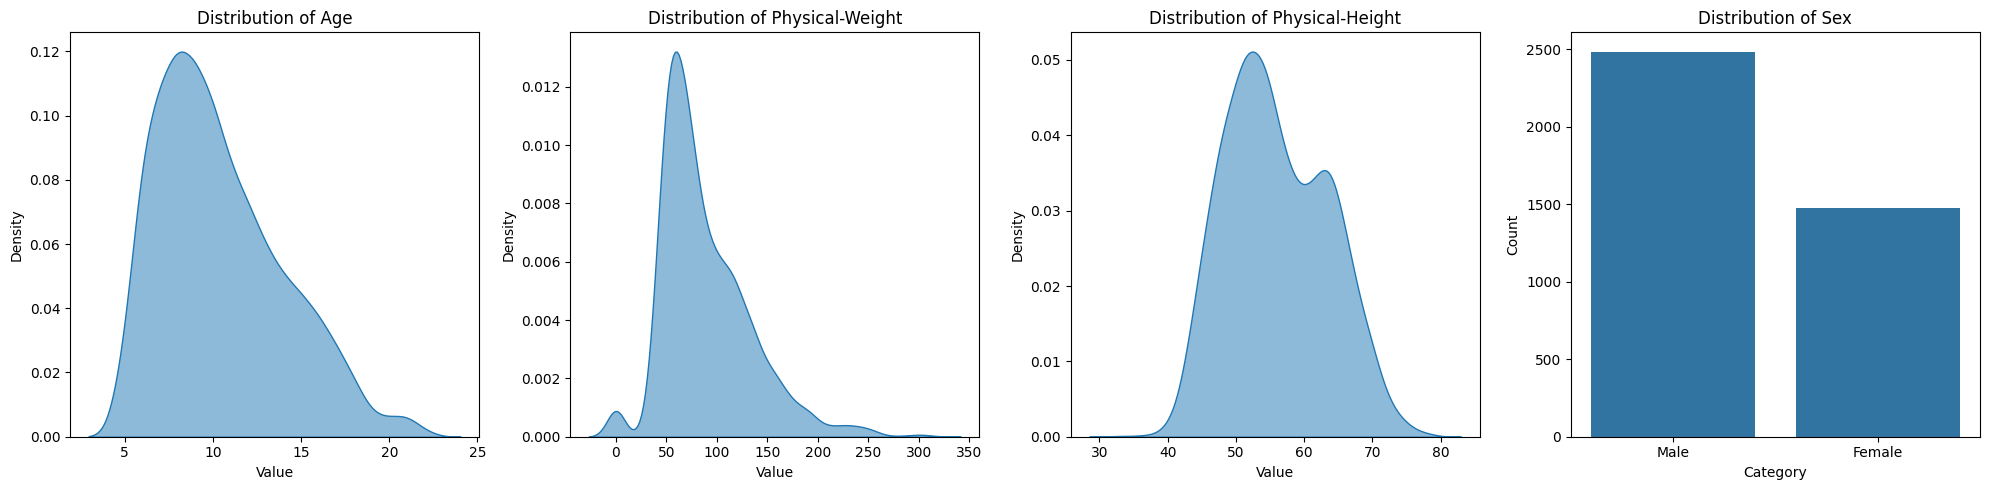

In [35]:
# Check the distribution of the some variables
columns_to_plot = ['Age', 'Physical-Weight', 'Physical-Height', 'Sex',] 
num_columns = len(columns_to_plot)  
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 5))  

for i, column in enumerate(columns_to_plot):  
    if column == 'Sex':  
        sns.countplot(x=column, data=df, ax=axes[i])
        axes[i].set_xticklabels(['Male', 'Female'])
        axes[i].set_title(f'Distribution of {column}')  
        axes[i].set_xlabel('Category')  
        axes[i].set_ylabel('Count')  
    else:  
        sns.kdeplot(df[column], ax=axes[i], fill=True, alpha=0.5)  
        axes[i].set_title(f'Distribution of {column}')  
        axes[i].set_xlabel('Value')  
        axes[i].set_ylabel('Density')  

plt.tight_layout()  
plt.show()  

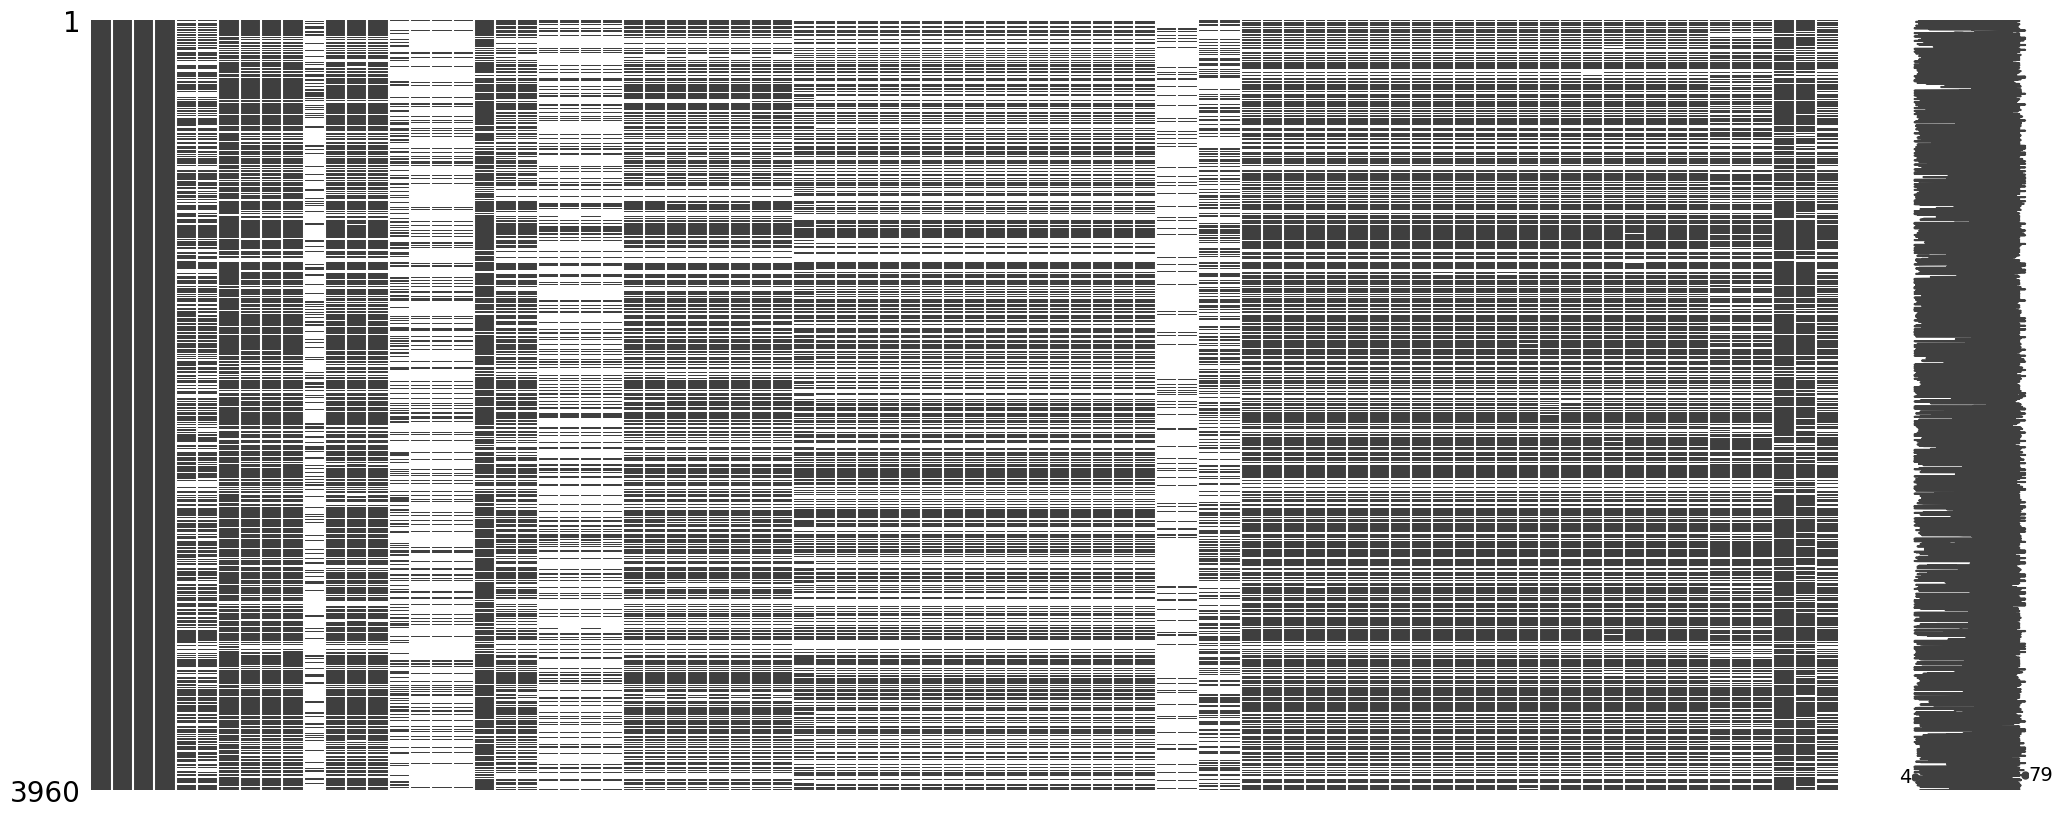

In [36]:
msno.matrix(df)
plt.show()

In [37]:
# Check the number and percentage of missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
id,0,0.000000
Enrol_Season,0,0.000000
Age,0,0.000000
Sex,0,0.000000
CGAS-Season,1405,35.479798
...,...,...
SDS-SDS_Total_Raw,1351,34.116162
SDS-SDS_Total_T,1354,34.191919
PreInt_EduHx-Season,420,10.606061
PreInt_EduHx-computerinternet_hoursday,659,16.641414


In [38]:
df[['Physical-BMI', 'BIA-BIA_BMI']] # Values are the same but Physical-BMI has less Nan Values

,Physical-BMI,BIA-BIA_BMI
0,16.877316,16.8792
1,14.035590,14.0371
2,16.648696,NaN
3,18.292347,18.2943
4,NaN,NaN
...,...,...
3955,16.362460,16.3642
3956,18.764678,NaN
3957,21.441500,21.4438
3958,12.235895,12.2372


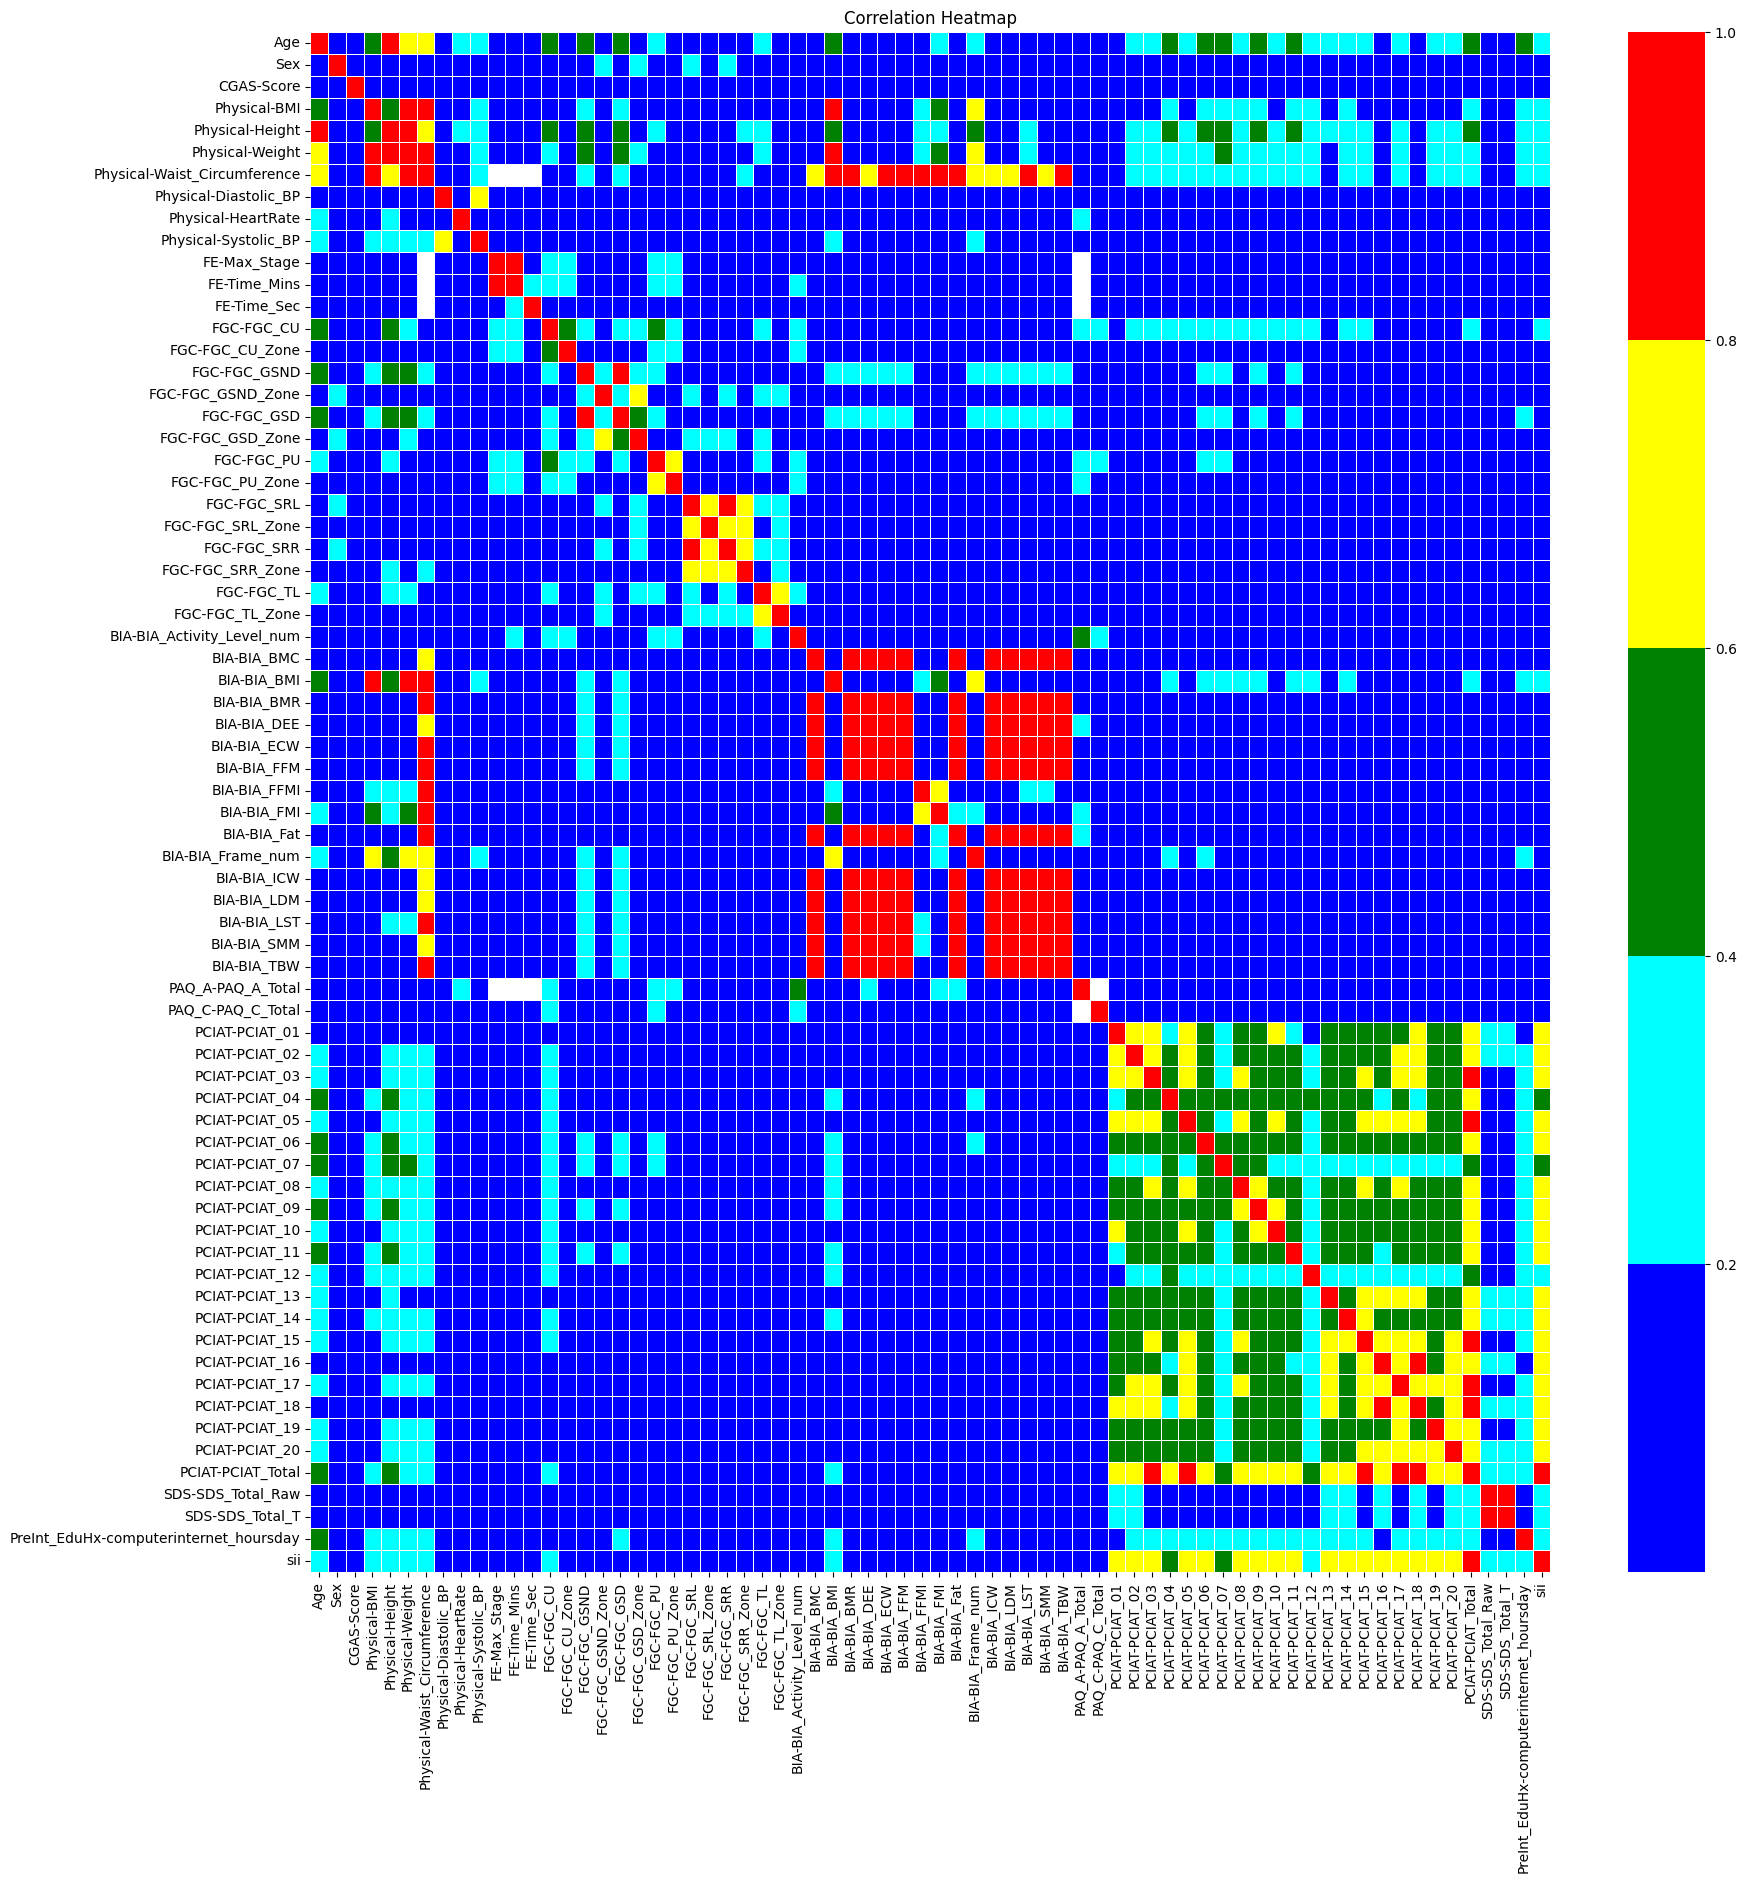

In [39]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap to check the correlation between the variables
corr_df = numeric_df.corr().abs()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, annot=False, cmap=['blue', 'cyan', 'green', 'yellow', 'red'], linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
# Identify columns that have more than 70% correlation with the target variable
sii_corr = numeric_df.corr()['sii'].abs()
sii_corr = sii_corr[sii_corr > 0.7].sort_values(ascending=False)
sii_corr

sii                  1.000000
PCIAT-PCIAT_Total    0.899681
PCIAT-PCIAT_15       0.751399
PCIAT-PCIAT_18       0.731112
PCIAT-PCIAT_17       0.729867
PCIAT-PCIAT_05       0.722722
PCIAT-PCIAT_13       0.705679
PCIAT-PCIAT_20       0.703013
Name: sii, dtype: float64

In [41]:
# Identify columns that have more than 70% correlation with the target variable
t_corr = numeric_df.corr()['SDS-SDS_Total_T'].abs()
t_corr = t_corr[t_corr > 0.7].sort_values(ascending=False)
t_corr

SDS-SDS_Total_T      1.000000
SDS-SDS_Total_Raw    0.996134
Name: SDS-SDS_Total_T, dtype: float64

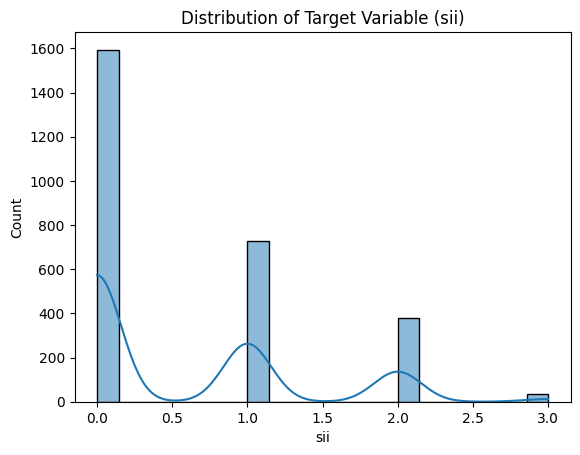

In [42]:
# Distribution of the target variable
sns.histplot(df['sii'], kde=True)
plt.title('Distribution of Target Variable (sii)')
plt.show()

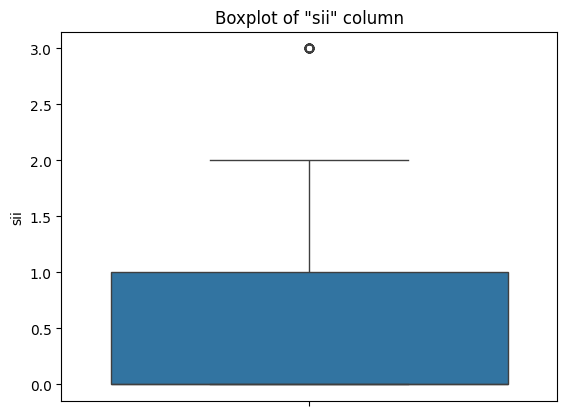

In [43]:
# Boxplot for outlier detection

sns.boxplot(df['sii'])
plt.title(f'Boxplot of "sii" column')
plt.show()

# Data Preprocessing #

In [44]:
# Ensure that the main data is not changed
df_data = df.copy()

# Remove the id column
# df_data.drop(columns=['id'], inplace=True)

# Remove PCIAT-related columns
PCIAT_columns = []
for column in df.columns:
    if 'PCIAT' in column:
        PCIAT_columns.append(column)

df_data = df_data.drop(columns=PCIAT_columns, errors='ignore')

#Remove the columns that have more than 50% missing values
df_data = df_data.dropna(thresh=len(df) * 0.5, axis=1)

# Remove the rows that have more than 70% missing values
df_data = df_data.dropna(thresh=df_data.shape[1] * 0.3, axis=0)

# Check the shape of the data after removing the columns and rows
df_data.shape

(3041, 47)

In [45]:
# Select the columns that contain the season information
season_columns = []
for column in df_data.columns:
    if 'Season' in column:
        season_columns.append(column)

# Define equivalent numerical values for each season
season_mapping = {'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3}

# Change the season values to numerical values
for column in season_columns:
    df_data[column] = df_data[column].apply(lambda x: season_mapping.get(x) if pd.notna(x) else x)

# Check the data information after encoding
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041 entries, 0 to 3958
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3041 non-null   object 
 1   Enrol_Season                            3041 non-null   int64  
 2   Age                                     3041 non-null   int64  
 3   Sex                                     3041 non-null   int64  
 4   CGAS-Season                             2262 non-null   float64
 5   CGAS-Score                              2256 non-null   float64
 6   Physical-Season                         3020 non-null   float64
 7   Physical-BMI                            2962 non-null   float64
 8   Physical-Height                         2967 non-null   float64
 9   Physical-Weight                         2999 non-null   float64
 10  Physical-Diastolic_BP                   2903 non-null   float64
 

In [46]:
# Fill the missing values of the season columns by the mode function
for column in season_columns:
    if column in df_data.columns and (df_data[column].isnull().sum() > 0):
        df_data[column] = df_data[column].fillna(df_data[column].mode()[0])
        df_data[column] = df_data[column].astype(int)  # Convert the column to integer (similar to other season columns)

## Ensure that only numeric columns are selected
numeric_columns = df_data.select_dtypes(include=['float64']).columns

# Fill NaN values in other columns by KNN Imputation
imputer_algorithm = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_data[numeric_columns] = imputer_algorithm.fit_transform(df_data[numeric_columns])

# Check the data information after imputation
df_data.info()
df_data

<class 'pandas.core.frame.DataFrame'>
Index: 3041 entries, 0 to 3958
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3041 non-null   object 
 1   Enrol_Season                            3041 non-null   int64  
 2   Age                                     3041 non-null   int64  
 3   Sex                                     3041 non-null   int64  
 4   CGAS-Season                             3041 non-null   int32  
 5   CGAS-Score                              3041 non-null   float64
 6   Physical-Season                         3041 non-null   int32  
 7   Physical-BMI                            3041 non-null   float64
 8   Physical-Height                         3041 non-null   float64
 9   Physical-Weight                         3041 non-null   float64
 10  Physical-Diastolic_BP                   3041 non-null   float64
 

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,2,5,0,3,51.0,2,16.877316,46.0,50.8,...,8.89536,38.91770,19.54130,32.69090,0,36.2,51.4,2,3.0,2.0
1,000fd460,1,9,0,0,52.4,2,14.035590,48.0,46.0,...,14.97400,39.44970,15.41070,27.05520,2,46.0,64.0,1,0.0,0.0
2,00105258,1,10,1,2,71.0,2,16.648696,56.5,75.6,...,14.64446,56.55906,25.66322,45.73390,2,38.0,54.0,1,2.0,0.0
3,00115b9f,3,9,0,2,71.0,1,18.292347,56.0,81.6,...,16.77900,58.93380,26.47980,45.99660,1,31.0,45.0,3,0.0,1.0
5,001f3379,0,13,1,3,50.0,1,22.279952,59.5,112.2,...,20.90200,79.69820,35.38040,63.12650,1,40.0,56.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,ff759544,1,7,1,0,65.4,1,13.927006,48.5,46.6,...,15.14000,42.81850,18.09370,30.04530,1,48.0,67.0,1,0.0,1.0
3955,ff8a2de4,2,13,0,0,60.0,2,16.362460,59.5,82.4,...,17.97970,66.28890,29.77900,52.83200,3,35.0,50.0,2,1.0,1.0
3956,ffa9794a,3,10,0,0,62.2,0,18.764678,53.5,76.4,...,16.69382,53.62294,23.48328,41.54076,0,38.2,54.2,3,0.0,0.4
3957,ffcd4dbd,2,11,0,0,68.0,3,21.441500,60.0,109.8,...,21.34030,71.39030,28.77920,54.46300,3,56.0,77.0,2,0.0,1.0


In [47]:
# Manage outliers
for column in numeric_columns:
    if len(df_data[column].unique()) > 20:
        z_scores = np.abs(zscore(df_data[column]))
        outliers = df_data.index[z_scores > 3]
        df_data = df_data.drop(index=outliers)


## Outliers detection with the following functions
# def zscore_detector(data):
#     z_scores = np.abs(zscore(data))
#     return data.index[z_scores > 3].tolist()

# def iqr_detector(data):
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)
#     iqr = q3 - q1
#     lower_range = q1 - 1.5 * iqr
#     upper_range = q3 + 1.5 * iqr
#     return data.index[(data < lower_range) | (data > upper_range)].tolist()

# # Detect and drop outliers
# for column in numeric_columns:
#     if len(df_data[column].unique()) > 20:
#         outliers = zscore_detector(df_data[column])
#         df_data = df_data.drop(index=outliers)
#     else:
#         outliers = iqr_detector(df_data[column])
#         df_data = df_data.drop(index=outliers)

# Check final information
df_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2256 entries, 0 to 3958
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2256 non-null   object 
 1   Enrol_Season                            2256 non-null   int64  
 2   Age                                     2256 non-null   int64  
 3   Sex                                     2256 non-null   int64  
 4   CGAS-Season                             2256 non-null   int32  
 5   CGAS-Score                              2256 non-null   float64
 6   Physical-Season                         2256 non-null   int32  
 7   Physical-BMI                            2256 non-null   float64
 8   Physical-Height                         2256 non-null   float64
 9   Physical-Weight                         2256 non-null   float64
 10  Physical-Diastolic_BP                   2256 non-null   float64
 

### Feature Engineering

In [48]:
# Ignore columns that have less than %10 correlation with target columns
df_train = df_data[df_data.corr()['sii'][df_data.corr()['sii'].abs() > 0.1].index.tolist()]
df_train

ValueError: could not convert string to float: '00008ff9'

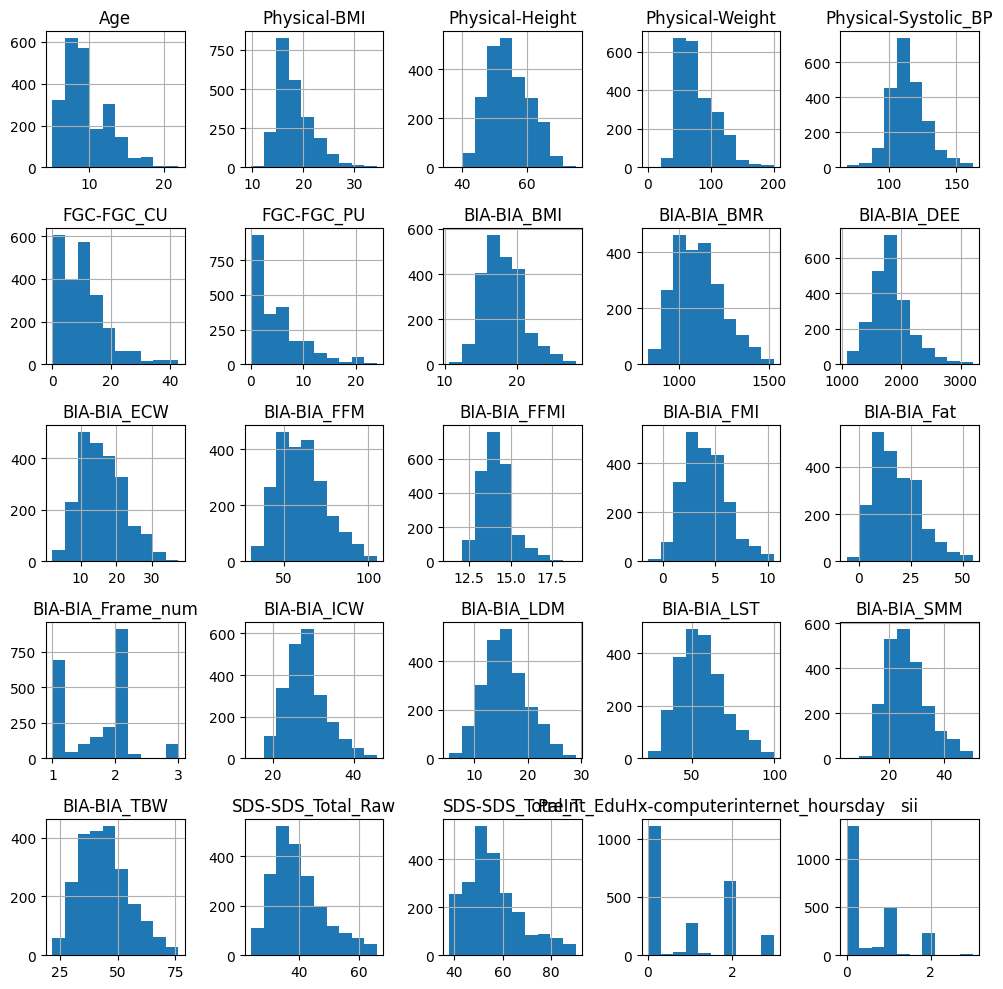

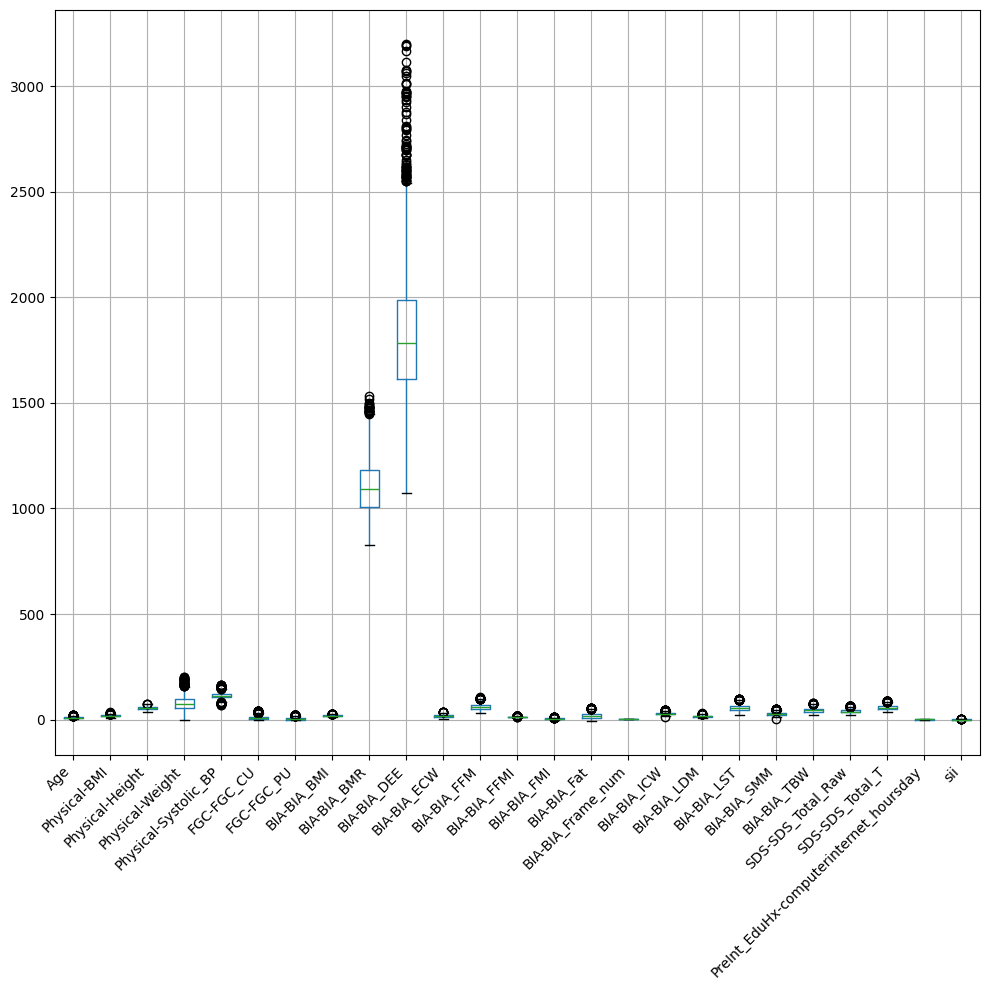

In [49]:
df_train.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

df_train.boxplot(figsize=(10, 10))
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [311]:
# Split the data into X and y variables as features and target variable
X = df_data.drop(columns=['id', 'sii'])
y = df_data['sii'].astype(int)

In [312]:
X
scaler = StandardScaler()  
X = scaler.fit_transform(X)  


In [270]:
y

0       2
1       0
2       0
3       1
7       1
       ..
3954    1
3955    1
3956    0
3957    1
3958    0
Name: sii, Length: 2256, dtype: int32

In [313]:
class_counts = df_data['sii'].value_counts()  
print(class_counts)  

sii
0.0    1272
1.0     504
2.0     228
0.4      79
0.2      68
0.6      55
0.8      30
3.0      10
1.2       6
1.4       4
Name: count, dtype: int64


In [314]:
class_counts = y.value_counts()  
print(class_counts)  

sii
0    1504
1     514
2     228
3      10
Name: count, dtype: int64


In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  

In [325]:
model = RandomForestClassifier(max_depth=10, n_estimators=100)  
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)  

f1_macro = f1_score(y_test, y_pred, average='macro')  
f1_micro = f1_score(y_test, y_pred, average='micro')  
f1_weighted = f1_score(y_test, y_pred, average='weighted')  

print(f'F1 Score (Macro): {f1_macro:.2f}')  
print(f'F1 Score (Micro): {f1_micro:.2f}')  
print(f'F1 Score (Weighted): {f1_weighted:.2f}')  

F1 Score (Macro): 0.31
F1 Score (Micro): 0.72
F1 Score (Weighted): 0.66


In [326]:
model = SVC(kernel='rbf', gamma='scale')  

model.fit(X_train, y_train)  

y_pred = model.predict(X_test)  

f1_macro = f1_score(y_test, y_pred, average='macro')  
f1_micro = f1_score(y_test, y_pred, average='micro')  
f1_weighted = f1_score(y_test, y_pred, average='weighted')  

print(f'F1 Score (Macro): {f1_macro:.2f}')  
print(f'F1 Score (Micro): {f1_micro:.2f}')  
print(f'F1 Score (Weighted): {f1_weighted:.2f}')  

F1 Score (Macro): 0.26
F1 Score (Micro): 0.70
F1 Score (Weighted): 0.62


# Exploratory Data Analysis (EDA)

C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


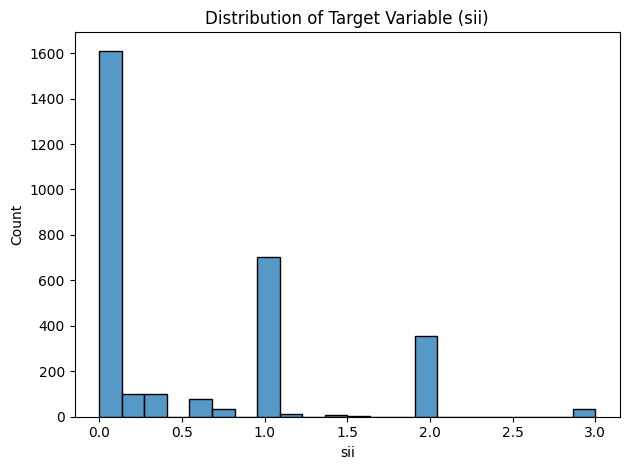

In [121]:
# # check the correlation between the variables by using heatmap
# plt.figure(figsize=(20, 15))
# sns.heatmap(df_train.corr(), annot=False, cmap=['blue', 'cyan', 'green', 'yellow', 'red'], linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.tight_layout()
# plt.show()

# Check the distribution of the sii column
# sns.histplot(df_train['sii'])
# plt.title('Distribution of Target Variable (sii)')
# plt.tight_layout()
# plt.show()

# # Boxplot for outlier detection
# sns.boxplot(df_train['sii'])
# plt.title(f'Boxplot of "sii" column')
# plt.tight_layout()
# plt.show()

In [ ]:
# correlation_with_target = df_data.corr()['sii'].abs().sort_values(ascending=False)
# correlation_with_target

In [ ]:
# base_folder = '/content/drive/MyDrive/Colab Notebooks/QBC8_AI_project_data_Q1/series.parquet'
# all_features = []

# for folder_name in os.listdir(base_folder):
#     folder_path = os.path.join(base_folder, folder_name)
#     file_path = os.path.join(folder_path, "part-0.parquet")

#     if os.path.isdir(folder_path) and os.path.exists(file_path):
#         try:
#             participant_id = folder_name[3:]

#             accel_data = pd.read_parquet(file_path)

#             # اینجا missing value رو توی هر ستون از فایل مورد نظرت مدیرت کن. یعنی مقادیر گم شده پر کن

#             features = {'id': participant_id}
#             for column in accel_data.select_dtypes(include=[np.number]).columns:
#                 # این پایینی ها مقادیر خروجی از فایل پارکت هستن که میخوایم استخراجشون کنیم و به عنوان نمونه گذاشتم و خودت به صلاحدید خودت مدیریتشون کن
#                 features[f'{column}_mean'] = accel_data[column].mean()
#                 features[f'{column}_std'] = accel_data[column].std()
#                 features[f'{column}_max'] = accel_data[column].max()
#                 features[f'{column}_min'] = accel_data[column].min()
#             all_features.append(features)
#         except Exception as e:
#             print(f"Error {folder_name}: {e}")

# accelerometer_features = pd.DataFrame(all_features)


In [277]:
acc_enmo = pd.read_csv('accelerometer_enmo.csv')

In [278]:
final_df = pd.merge(df_data, acc_enmo, on=['id'])
final_df

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,enmo1,enmo2,enmo3
0,00115b9f,3,9,0,2,71.0,1,18.292347,56.00,81.6,...,45.99660,1,31.0,45.0,3,0.0,1.0,44.846527,44.604200,10.549273
1,00f332d1,3,14,0,0,68.0,0,17.168636,66.50,108.0,...,68.68220,0,30.0,43.0,3,2.0,1.0,69.172683,23.107218,7.720099
2,012cadd8,0,9,0,3,60.0,2,17.089151,53.20,68.8,...,48.92462,1,27.0,40.0,0,0.0,0.0,63.356277,24.736213,11.907510
3,012e3869,1,6,0,3,60.0,1,18.463594,46.80,24.2,...,37.79220,0,36.8,52.2,1,0.0,0.0,80.560701,14.459059,4.980240
4,029a19c9,3,17,1,0,54.0,0,32.084107,64.25,188.4,...,50.50210,0,32.0,46.0,3,3.0,1.0,58.206385,35.573261,6.220353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,fe9c71d8,3,9,0,0,80.0,3,15.891137,56.75,72.8,...,44.65900,3,33.0,47.0,3,0.0,0.0,53.846070,34.890803,11.263128
720,fecc07d6,2,7,0,0,85.0,3,15.986589,49.00,54.6,...,39.31490,3,34.0,49.0,2,0.0,0.0,85.579276,10.530103,3.890621
721,ff18b749,0,7,0,0,55.0,1,14.768842,47.50,47.4,...,38.54410,1,62.0,85.0,0,0.0,0.0,57.095869,29.432840,13.471291
722,ffcd4dbd,2,11,0,0,68.0,3,21.441500,60.00,109.8,...,54.46300,3,56.0,77.0,2,0.0,1.0,69.113655,24.269035,6.617309


In [284]:
X = final_df.drop(columns=['id', 'sii'])
y = final_df['sii'].astype(int)

In [285]:
X


,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,...,BIA-BIA_SMM,BIA-BIA_TBW,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,enmo1,enmo2,enmo3
0,3,9,0,2,71.0,1,18.292347,56.00,81.6,60.0,...,26.47980,45.99660,1,31.0,45.0,3,0.0,44.846527,44.604200,10.549273
1,3,14,0,0,68.0,0,17.168636,66.50,108.0,60.0,...,42.10740,68.68220,0,30.0,43.0,3,2.0,69.172683,23.107218,7.720099
2,0,9,0,3,60.0,2,17.089151,53.20,68.8,62.0,...,27.71512,48.92462,1,27.0,40.0,0,0.0,63.356277,24.736213,11.907510
3,1,6,0,3,60.0,1,18.463594,46.80,24.2,73.0,...,21.13390,37.79220,0,36.8,52.2,1,0.0,80.560701,14.459059,4.980240
4,3,17,1,0,54.0,0,32.084107,64.25,188.4,72.0,...,29.46306,50.50210,0,32.0,46.0,3,3.0,58.206385,35.573261,6.220353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,3,9,0,0,80.0,3,15.891137,56.75,72.8,44.0,...,25.83650,44.65900,3,33.0,47.0,3,0.0,53.846070,34.890803,11.263128
720,2,7,0,0,85.0,3,15.986589,49.00,54.6,59.0,...,21.00460,39.31490,3,34.0,49.0,2,0.0,85.579276,10.530103,3.890621
721,0,7,0,0,55.0,1,14.768842,47.50,47.4,58.0,...,20.82238,38.54410,1,62.0,85.0,0,0.0,57.095869,29.432840,13.471291
722,2,11,0,0,68.0,3,21.441500,60.00,109.8,79.0,...,28.77920,54.46300,3,56.0,77.0,2,0.0,69.113655,24.269035,6.617309


In [286]:
scaler = StandardScaler()  
X = scaler.fit_transform(X)  
X

array([[ 1.42235828, -0.16388874, -0.72402384, ..., -0.94210081,
         1.31892259, -0.05308147],
       [ 1.42235828,  1.59657782, -0.72402384, ...,  0.56019059,
        -0.5030964 , -0.54373963],
       [-1.28523347, -0.16388874, -0.72402384, ...,  0.20099137,
        -0.36502773,  0.18247485],
       ...,
       [-1.28523347, -0.86807536, -0.72402384, ..., -0.18562776,
         0.0330441 ,  0.45367843],
       [ 0.5198277 ,  0.54029789, -0.72402384, ...,  0.55654525,
        -0.40462429, -0.73499425],
       [-1.28523347,  1.24448451, -0.72402384, ...,  1.25362823,
        -1.42805732, -0.59846186]])

In [287]:
y

0      1
1      1
2      0
3      0
4      1
      ..
719    0
720    0
721    0
722    1
723    0
Name: sii, Length: 724, dtype: int32

In [288]:
class_counts = final_df['sii'].value_counts()  
print(class_counts)  

sii
0.0    455
1.0    180
2.0     84
3.0      5
Name: count, dtype: int64


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)  

In [290]:
from sklearn.model_selection import GridSearchCV  

param_grid = {'n_estimators': [100, 500], 'max_depth': [None, 10, 100]}  
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=4)  
grid.fit(X_train, y_train)  
print(grid.best_params_)  

{'max_depth': None, 'n_estimators': 500}


In [292]:
model = RandomForestClassifier(max_depth=10, n_estimators=500)  
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)  

f1_macro = f1_score(y_test, y_pred, average='macro')  
f1_micro = f1_score(y_test, y_pred, average='micro')  
f1_weighted = f1_score(y_test, y_pred, average='weighted')  

print(f'F1 Score (Macro): {f1_macro:.2f}')  
print(f'F1 Score (Micro): {f1_micro:.2f}')  
print(f'F1 Score (Weighted): {f1_weighted:.2f}')  

F1 Score (Macro): 0.28
F1 Score (Micro): 0.65
F1 Score (Weighted): 0.56


In [293]:
model = SVC(kernel='rbf', gamma='scale')  

model.fit(X_train, y_train)  

y_pred = model.predict(X_test)  

f1_macro = f1_score(y_test, y_pred, average='macro')  
f1_micro = f1_score(y_test, y_pred, average='micro')  
f1_weighted = f1_score(y_test, y_pred, average='weighted')  

print(f'F1 Score (Macro): {f1_macro:.2f}')  
print(f'F1 Score (Micro): {f1_micro:.2f}')  
print(f'F1 Score (Weighted): {f1_weighted:.2f}')  

F1 Score (Macro): 0.24
F1 Score (Micro): 0.63
F1 Score (Weighted): 0.54


In [212]:
# from sklearn.model_selection import cross_val_score  

# model = LogisticRegression(solver='liblinear', max_iter=500)
# scores = cross_val_score(model, X, y, cv=4)  
# print(f'Cross-validation scores: {scores}')  

# model = RandomForestClassifier(max_depth=10, n_estimators=100)
# scores = cross_val_score(model, X, y, cv=4)  
# print(f'Cross-validation scores: {scores}')  

# PART 2 

In [220]:
male_df = df[df['Sex'] == 0].copy()
female_df = df[df['Sex'] == 1].copy()

In [221]:
female_df[female_df['BIA-BIA_BMR'] > 4000] # Outiliers

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
3205,cedf96c5,2,9,1,0.0,50.0,3.0,16.972291,54.0,70.4,...,1.0,0.0,0.0,13.0,3.0,36.0,51.0,2.0,0.0,0.0
3511,e252dcb6,0,13,1,2.0,58.0,0.0,23.605261,61.5,127.0,...,4.0,4.0,4.0,68.0,1.0,48.0,67.0,0.0,3.0,2.0


In [222]:
female_df[female_df['CGAS-Score'] > 100] # Outliers

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
2065,83525bbe,2,11,1,3.0,999.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN


C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


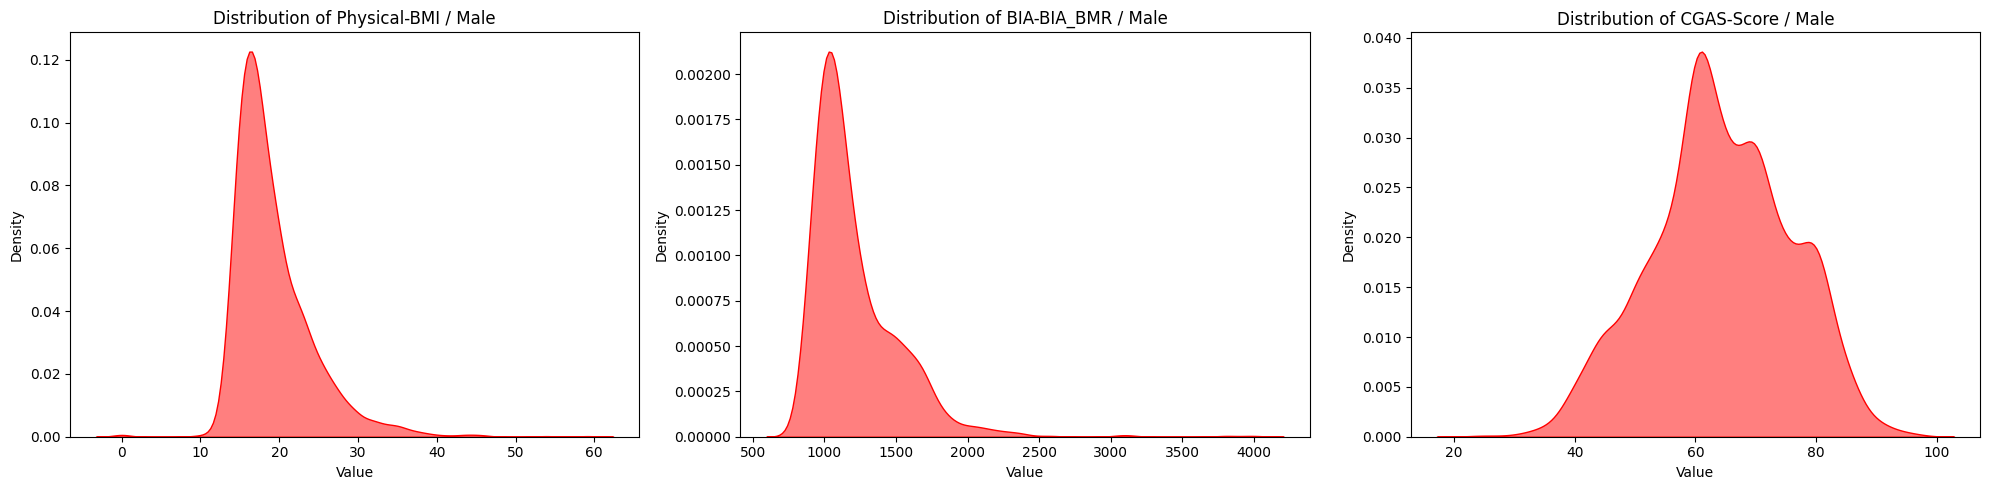

C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramti\anaconda3\envs\quera\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


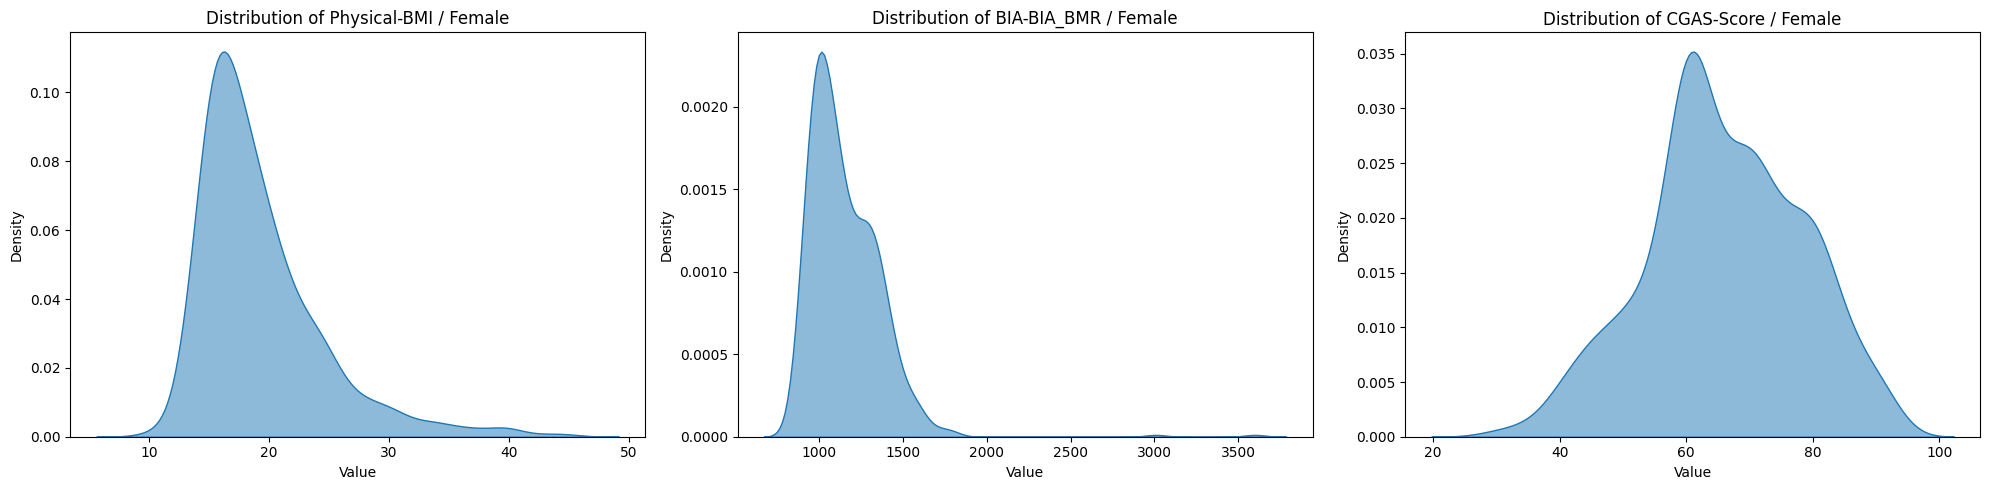

In [24]:
# Physical-BMI
# BIA-BIA_BMI
# شاخص توده‌ی بدنی
# BIA-BIA_BMR
# نرخ متابولیسم پایه
# CGAS-Score
# معیار کلی میزان عملکرد ذهنی افراد زیر ۱۸ سال


female_df = female_df[female_df['CGAS-Score'] < 100] # Outliers
female_df = female_df[female_df['BIA-BIA_BMR'] < 4000]

columns_to_plot = ['Physical-BMI', 'BIA-BIA_BMR', 'CGAS-Score']
num_columns = len(columns_to_plot)  
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 5))  
for i, column in enumerate(columns_to_plot):  
        sns.kdeplot(male_df[column], ax=axes[i], fill=True, alpha=0.5, color='red')  
        axes[i].set_title(f'Distribution of {column} / Male')  
        axes[i].set_xlabel('Value')  
        axes[i].set_ylabel('Density')  
plt.tight_layout()  
plt.show()  

fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(20, 5))  
for i, column in enumerate(columns_to_plot):  
        sns.kdeplot(female_df[column], ax=axes[i], fill=True, alpha=0.5)  
        axes[i].set_title(f'Distribution of {column} / Female')  
        axes[i].set_xlabel('Value')  
        axes[i].set_ylabel('Density')  
plt.tight_layout()  
plt.show()

In [25]:
male_df.describe()

,Age,Sex,CGAS-Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FE-Max_Stage,FE-Time_Mins,FE-Time_Sec,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,2484.000000,2484.0,1553.000000,1920.000000,1922.000000,1956.000000,539.000000,1868.000000,1876.000000,1868.000000,479.000000,479.000000,479.000000,1495.000000,1468.000000,679.000000,669.000000,679.000000,669.000000,1486.000000,1460.000000,1481.000000,1456.000000,1482.000000,1457.000000,1495.000000,1469.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,272.000000,1083.000000,1737.000000,1738.000000,1736.000000,1737.000000,1733.000000,1737.000000,1735.000000,1737.000000,1738.000000,1738.000000,1738.000000,1737.000000,1735.000000,1738.000000,1737.000000,1733.000000,1731.000000,1734.000000,1735.000000,1738.000000,1739.000000,1663.000000,1662.000000,2096.000000,1739.000000
mean,10.257246,0.0,64.194462,19.232013,56.028606,88.929182,27.369388,69.627409,81.319296,117.311563,5.077244,7.559499,27.125261,11.119732,0.465259,23.054094,1.715994,24.256907,1.780269,6.330417,0.342466,8.014315,0.591346,8.127227,0.599176,8.992441,0.755616,2.724960,4.563161,19.287545,1210.548410,2093.847607,18.341661,71.202325,15.135579,4.151968,20.493138,1.759141,33.966061,18.894611,66.639171,33.407844,52.307723,2.323018,2.654404,2.501439,2.267549,2.535138,0.914220,2.421812,1.115717,0.547550,1.286701,1.061565,1.365362,1.698504,0.243523,1.439193,1.055236,1.622337,1.563185,1.740035,1.741061,1.265706,1.004603,29.338125,41.247144,57.947653,1.061069,0.638873
std,3.481302,0.0,11.365906,4.961223,7.724429,45.438935,5.680682,13.954258,13.810098,17.408459,1.984322,3.256167,18.106062,11.792822,0.498962,11.076090,0.601942,11.949891,0.607709,8.037151,0.474697,3.386568,0.491754,3.382664,0.490234,3.024100,0.429868,1.035118,2.389529,4.854779,304.356156,651.437699,11.881652,32.417953,3.866611,4.347584,22.792086,0.686279,12.442233,8.553403,31.562644,19.579849,24.253591,0.880279,0.808210,1.690010,1.726323,1.620093,1.265507,1.737153,1.321076,1.003979,1.382749,1.268822,1.373529,1.575579,0.532357,1.466924,1.324387,1.562863,1.545374,1.494695,1.583006,1.412277,1.237014,20.829645,10.717110,13.556012,1.084097,0.798882
min,5.000000,0.0,25.000000,0.000000,33.000000,0.000000,18.000000,11.000000,27.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.401540,10.676600,813.397000,1073.450000,1.789450,28.900400,11.322900,-66.378000,-217.522000,1.000000,14.489000,4.635810,23.620100,4.655730,20.589200,0.660000,0.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,38.000000,0.000000,0.000000
25%,8.000000,0.0,55.000000,15.865054,50.000000,57.550000,23.000000,61.000000,72.000000,107.000000,4.000000,6.000000,12.000000,2.000000,0.000000,15.100000,1.00000

In [26]:
pd.set_option('display.max_columns', None)  
female_df.describe(include='all')  

,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FE-Season,FE-Max_Stage,FE-Time_Mins,FE-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
count,577,577,577.000000,577.0,577,577.000000,577,576.000000,576.000000,576.000000,91.000000,570.000000,571.000000,570.000000,287,202.000000,199.000000,199.000000,562,476.000000,467.000000,215.000000,214.000000,215.000000,215.000000,472.000000,463.000000,477.000000,468.000000,477.000000,468.000000,477.000000,468.000000,577,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,85,85.000000,306,306.000000,569,569.000000,569.000000,568.000000,568.000000,569.000000,569.000000,568.000000,567.00000,567.000000,568.000000,569.000000,569.000000,568.000000,567.000000,567.000000,568.000000,568.000000,568.000000,568.000000,568.000000,569.000000,516,516.000000,516.000000,577,565.000000,569.000000
unique,577,4,NaN,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN
top,fefaffe0,Spring,NaN,NaN,Spring,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,NaN,Spring,NaN,Spring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,Spring,NaN,NaN
freq,1,168,NaN,NaN,178,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN,98,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153,NaN,NaN,163,NaN,NaN
mean,NaN,NaN,10.365685,1.0,NaN,65.930676,NaN,19.311288,55.394410,88.505208,25.901099,69.819298,82.966725,116.596491,NaN,4.856436,7.050251,29.798995,NaN,12.336134,0.576017,21.283256,2.023364,22.103256,2.134884,4.694915,0.341253,10.189203,0.728632,10.282600,0.709402,9.553459,0.835470,NaN,2.571924,4.430236,19.405366,1151.517808,1826.629480,20.037310,64.914777,14.497091,4.908276,23.773042,1.729636,27.755232,17.122235,60.484542,29.959499,47.792541,NaN,2.074153,NaN,2.457497,NaN,2.154657,1.961336,2.126761,0.697183,2.061511,0.989455,0.663732,1.17284,1.044092,1.151408,1.557118,0.242531,1.156690,0.961199,1.282187,1.253521,1.401408,1.401408,0.966549,0.822183,25.031634,NaN,40.517442,57.069767,NaN,0.964602,0.478032
std,NaN,NaN,3.489031,0.0,NaN,12.254763,NaN,5.167626,6.943626,40.696178,5.302106,13.330224,13.439688,16.913571,NaN,2.195469,3.076054,16.639365,NaN,11.943747,0.494718,10.999528,0.576875,9.226994,0.576358,5.815286,0.474643,2.768313,0.445141,2.822669,0.454524,2.728963,0.371152,NaN,